## Standard start

In [1]:
from finished import kinematika
from finished import communicator_v2
from finished import kamera
from finished import environment
import numpy as np
import serial
import time
import cv2

from IPython.display import display, clear_output
from PIL import Image


#PID konstante in movement parameters za oranzno pingpong 
#K_p = 0.00038
#K_i = 0.00009
#K_d = 0.00011
#acceleration = 100
#feedrate = 1200
#delay = 0.07

# PID konstante za počasnejše premikanje
K_p = 0.00002
K_i = 0.00
K_d = 0.00
PID = kinematika.PID_controller(np.array([0,0]), np.array([0,0]), np.deg2rad(16), np.deg2rad(45), K_p, K_i, K_d)
acceleration = 100
feedrate = 1200
delay = 0.08

camera_matrix = np.array([[649.84070017, 0.00000000e+00, 326.70849136],
                [0.00000000e+00, 650.79575464, 306.13746377],
                [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

distortion_coefficients = np.array([-0.4586199,  0.20583847,   0.00120806,  0.00507029,  -0.0083358])
serial_port = 'COM5'
ser = serial.Serial(serial_port, 115200, timeout=1)
#PID = kinematika.PID_controller(np.array([0,0]), np.array([0,0]), np.deg2rad(16), np.deg2rad(45), K_p, K_i, K_d)

kamera_object = kamera.CV2Wrapper(camera_index=1, window_name='Webcam feed', camera_matrix=camera_matrix, distortion_coefficients=distortion_coefficients)
communication_object = communicator_v2.SerialCommunication(ser=ser, normal_acceleration=acceleration)
kamera_object.adjust_raw_exposure(-8.1) # value according to exposure_calibration_SCRIPT.py



Printer response: [b'start\n', b'echo: External Reset\n', b'Marlin 1.1.6.2\n', b'\n', b'echo: Last Updated: 2018-11-28 | Author: (Ender-3 Pro)\n', b'echo:Compiled: May 24 2019\n', b'echo: Free Memory: 10078  PlannerBufferBytes: 1232\n', b'echo:TF init fail\n', b'echo:TF init fail\n']
Communication with board established. Max speed set to 5000, max acceleration to 200.


In [10]:
import numpy as np
from finished import kinematika

#Dejanski parametri skrajšano
b = 0.071589 # m
p = 0.116 # m
l_1 = 0.08254 # m
l_2 = 0.1775 # m

mtx = np.array([[649.84070017, 0.00000000e+00, 326.70849136],
                [0.00000000e+00, 650.79575464, 306.13746377],
                 [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])
dist = np.array([-0.4586199,  0.20583847,   0.00120806,  0.00507029,  -0.0083358])

flat_position=kinematika.izracun_kotov(b, p, l_1, l_2, 0.19, 7, 7) # hardcoded 0.19
a = kinematika.deg2steps(flat_position)
a




array([0.66441757, 2.78697108, 8.85964732])

### PID konstante za testiranje

In [64]:
#PID konstante in movement parameters za oranzno pingpong - POSEBEJ
K_p = 0.0001
K_i = 0.000001
K_d = 0.00001
PID = kinematika.PID_controller(np.array([0,0]), np.array([0,0]), np.deg2rad(16), np.deg2rad(45), K_p, K_i, K_d)
acceleration = 100
feedrate = 1200
delay = 0.07

In [65]:
env_object = environment.ManipulatorEnv(kamera_obj=kamera_object, comm_obj=communication_object, PID_obj=PID, feedrate=feedrate, delay=delay)

In [67]:
env_object.reset(b, p, l_1, l_2, show_feed=False)

Steppers enabled (locked).
Sent: G1 X4.04822 Y4.04822 Z4.04822 F1000
No contour detected
No ball detected, searching again...
3 consective frames with ball detected. Balancing started.
Sent: G1 X4.59025 Y4.00344 Z3.55316 F1200
Sent: G1 X4.59096 Y4.00274 Z3.55314 F1200
Sent: G1 X4.59220 Y4.00154 Z3.55311 F1200
Sent: G1 X4.58744 Y4.00641 Z3.55298 F1200
Sent: G1 X4.58953 Y4.00084 Z3.55647 F1200
Sent: G1 X4.59211 Y3.99220 Z3.56251 F1200
Sent: G1 X4.59548 Y3.99008 Z3.56128 F1200
Sent: G1 X4.59594 Y3.98317 Z3.56771 F1200
Sent: G1 X4.60067 Y3.97934 Z3.56685 F1200
Sent: G1 X4.61095 Y3.96904 Z3.56692 F1200
Sent: G1 X4.61299 Y3.96706 Z3.56687 F1200
Sent: G1 X4.61909 Y3.96099 Z3.56687 F1200
Sent: G1 X4.62009 Y3.96007 Z3.56679 F1200
Sent: G1 X4.62735 Y3.95286 Z3.56679 F1200
Sent: G1 X4.63732 Y3.94292 Z3.56682 F1200
Sent: G1 X4.64186 Y3.93233 Z3.57287 F1200
Sent: G1 X4.64934 Y3.92831 Z3.56947 F1200
Sent: G1 X4.66088 Y3.91658 Z3.56973 F1200
Sent: G1 X4.67533 Y3.90212 Z3.56983 F1200
Sent: G1 X4.67716

TypeError: unsupported operand type(s) for -: 'NoneType' and 'int'

#### Test kamere in trackinga

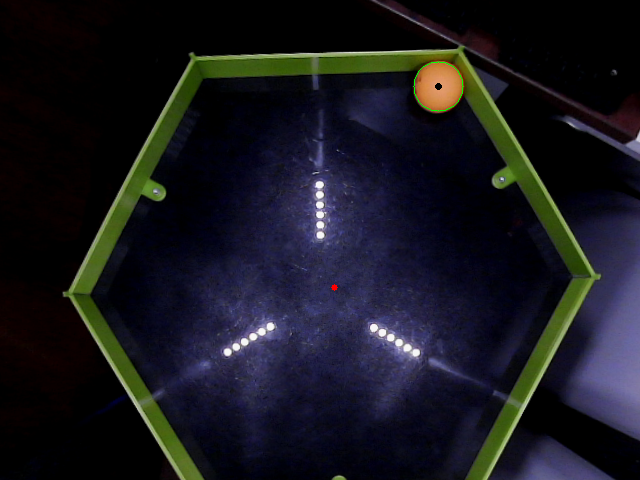

In [4]:
lower_color = np.array([0, 50, 120])    
upper_color = np.array([36, 255, 251])
alpha = 0.7
ret, frame = kamera_object.cap.read()
processed_frame, current_position, current_velocity = kamera_object.process_frame(frame, lower_color, upper_color, alpha)
processed_frame = cv2.cvtColor(processed_frame, cv2.COLOR_BGR2RGB)
img = Image.fromarray(processed_frame)
clear_output(wait=True)
display(img)

### Parametri manipulatorja

In [1]:
#Dejanski parametri skrajšano
b = 0.071589 # m
p = 0.116 # m
l_1 = 0.08254 # m
l_2 = 0.1775 # m

mtx = np.array([[649.84070017, 0.00000000e+00, 326.70849136],
                [0.00000000e+00, 650.79575464, 306.13746377],
                 [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])
dist = np.array([-0.4586199,  0.20583847,   0.00120806,  0.00507029,  -0.0083358])


NameError: name 'np' is not defined

## 

#### Lift plošče

In [3]:
flat_position=kinematika.izracun_kotov(b, p, l_1, l_2, 0.19, 0, 0) # hardcoded 0.19
flat_steps=kinematika.deg2steps(flat_position)
communication_object.enable_steppers()
time.sleep(0.5)
communication_object.move_to_position(flat_steps, feedrate=1000)

Steppers enabled (locked).
Sent: G1 X4.04822 Y4.04822 Z4.04822 F1000


#### Plošča tilted

In [8]:
flat_position=kinematika.izracun_kotov(b, p, l_1, l_2, 0.19, 1, 1) # hardcoded 0.19
flat_steps=kinematika.deg2steps(flat_position)
communication_object.move_to_position(flat_steps, feedrate=1000)
time.sleep(0.5)

Sent: G1 X3.56013 Y3.86865 Z4.71883 F1000


#### Drop plošče in disable steppers

In [9]:
flat_position=kinematika.izracun_kotov(b, p, l_1, l_2, 0.15, 0, 0) # hardcoded 0.19
flat_steps=kinematika.deg2steps(flat_position)
communication_object.move_to_position(flat_steps, feedrate=1000)
time.sleep(3)
communication_object.disable_steppers()

Sent: G1 X-6.03843 Y-6.03843 Z-6.03843 F1000
Steppers disabled (unlocked).


In [7]:
env_object.reset(b, p, l_1, l_2, show_feed=False)

Steppers enabled (locked).
Sent: G1 X4.04822 Y4.04822 Z4.04822 F1000
3 consective frames with ball detected. Balancing started.
Sent: G1 X8.34289 Y3.96772 Z-0.02106 F1200
Sent: G1 X8.52352 Y6.21234 Z-2.36921 F1200
Sent: G1 X7.96331 Y3.67276 Z0.62394 F1200
Sent: G1 X8.33542 Y3.99400 Z-0.03990 F1200
Sent: G1 X7.88723 Y3.60666 Z0.76055 F1200
Sent: G1 X8.69116 Y4.29758 Z-0.66773 F1200
Sent: G1 X8.77403 Y3.86710 Z-0.32231 F1200
Sent: G1 X8.85369 Y3.51895 Z-0.05342 F1200
Sent: G1 X6.65139 Y4.00972 Z1.53668 F1200
Sent: G1 X6.44328 Y3.80380 Z1.93996 F1200
Sent: G1 X6.46560 Y4.16457 Z1.56252 F1200
Sent: G1 X4.93883 Y4.01970 Z3.19228 F1200
Sent: G1 X4.09123 Y3.90338 Z4.15019 F1200
Sent: G1 X4.78808 Y3.65274 Z3.70722 F1200
Sent: G1 X2.96686 Y3.81042 Z5.37972 F1200
Sent: G1 X1.54935 Y3.66144 Z6.99742 F1200
Sent: G1 X0.66437 Y3.17454 Z8.44616 F1200
Sent: G1 X-0.12781 Y2.79604 Z9.71420 F1200
Sent: G1 X0.74078 Y2.82856 Z8.73262 F1200
Sent: G1 X-1.23981 Y2.74977 Z11.00644 F1200
Sent: G1 X-2.39957 Y2.6

TypeError: unsupported operand type(s) for -: 'NoneType' and 'int'